In [12]:
# Library: OpenCV, NumPy, sys
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt



In [13]:
# History is for storing images
# Log is for storing operation descriptions
history = []
log = []

# everytime a new image is processed, we save the state
def save_state(img):
    history.append(img.copy())

# If you want to undo an operation, you can call this function
def undo():
    if len(history) > 1:
        # remove the last image from history
        history.pop()
        print("Undo successful.")
        return history[-1]
    else:
        # if there's only one image in history, we can't undo
        print("Nothing to undo.")
        return history[-1]

# show history of operations
def show_history():
    print("\n=== Operation History ===")
    for entry in log:
        # Print each entry in the log
        print(f"- {entry}")
    print()



In [14]:
# Brightness
# takes an image and a value
def adjust_brightness(img, value):
    
    # calls save_state to save the current state of the image
    save_state(img)

    # adjusts brightness by adding the value to each pixel
    result = np.clip(img + value, 0, 255).astype(np.uint8)

    # logs the operation
    log.append(f"brightness {value:+}")

    # Show side-by-side using matplotlib
    plt.figure(figsize=(12, 6))
    plt.suptitle('Brightness Adjustment', fontsize=16)

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Brightness Adjusted
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"Brightness: {value:+}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return result

In [15]:
# Contrast
def adjust_contrast(img, factor):
    save_state(img)

    # adjusts contrast by scaling the pixel values
    result = np.clip(128 + factor * (img - 128), 0, 255).astype(np.uint8)
    
    log.append(f"contrast factor {factor:.2f}")

    # Show side-by-side using matplotlib
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Contrast Adjustment (Factor: {factor:.2f})', fontsize=16)

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Contrast Adjusted
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Contrast Adjusted")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    return result

In [16]:
# convert to grayscale
def convert_grayscale(img):
    save_state(img)

    # converts the image to grayscale using OpenCV
    gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    log.append("converted to grayscale")

    # Show side-by-side
    plt.figure(figsize=(12, 6))
    plt.suptitle("Grayscale Conversion", fontsize=16)

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Grayscale
    plt.subplot(1, 2, 2)
    plt.imshow(gray_scale, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


    return gray_scale

In [17]:

# Padding
def add_padding(img):
    save_state(img)

    # Common border types for padding
    border_types = {
        "constant": cv2.BORDER_CONSTANT,
        "reflect": cv2.BORDER_REFLECT,
        "replicate": cv2.BORDER_REPLICATE
    }

    print("Border types: constant, reflect, replicate")
    # strip() removes leading/trailing whitespace, lower() converts to lowercase
    border_input = input("Enter border type: ").strip().lower()
    
    # error handling for invalid input
    # if the input is not in the dictionary, default to constant
    border_type = border_types.get(border_input, cv2.BORDER_CONSTANT)

    # get padding size and mode from user
    pad_size = int(input("Enter padding size in pixels: "))
    
    mode = input("Enter padding mode (square, rectangle, custom ratio, or default): ").strip().lower()
    if mode not in ["square", "rectangle", "custom ratio"]:
        print("Invalid mode. Defaulting to 'constant' padding.")
        mode = "constant"
        
    
    # gives the dimensions of the image
    # only takes first two dimensions (height and width)
    h, w = img.shape[:2]

    # determine padding based on mode
    if mode == "square":
        size = max(h, w)
        pad_vert = (size - h) // 2
        pad_horz = (size - w) // 2
    
    elif mode == "rectangle":
        size = int(max(h, w) * 1.5)
        pad_vert = (size - h) // 2
        pad_horz = (size - w) // 2

    elif mode == "custom ratio":
        ratio_str = input("Enter ratio (e.g., 4:5): ")
        w_ratio, h_ratio = map(int, ratio_str.split(":"))
        target_h = int(w * h_ratio / w_ratio)
        target_w = int(h * w_ratio / h_ratio)

        pad_vert = max((target_h - h) // 2, 0)
        pad_horz = max((target_w - w) // 2, 0)
    else:
        pad_vert = pad_horz = pad_size

    result = cv2.copyMakeBorder(img, pad_vert, pad_vert, pad_horz, pad_horz, border_type)
    
    # Show side-by-side using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)
    plt.title("Padded Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    log.append(f"padded {pad_vert}px x {pad_horz}px with {border_input}")
    return result

In [18]:
# Thresholding
def apply_threshold(img):
    save_state(img)
    # checks if the image is colored or grayscale
    # if colored, convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

    # asks user for threshold type
    threshhold_type_input = input("Threshold type (binary/inverse): ").strip().lower()

    # sets the threshold type based on user input
    thresh_type = cv2.THRESH_BINARY if threshhold_type_input  == "binary" else cv2.THRESH_BINARY_INV
    _, result = cv2.threshold(gray, 127, 255, thresh_type)

    # if the input is not binary or inverse, default to binary
    log.append(f"threshold ({threshhold_type_input}) applied")

    # Show side-by-side
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Thresholding ({threshhold_type_input})", fontsize=16)

    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return result


In [19]:
# Image Blending
# copied part 2
def blend_images(img):
    save_state(img)
    path2 = input("Enter path to second image: ")

    
    img2 = cv2.imread(path2)
    if img2 is None:
        print("Error: Could not load second image.")
        return img
    
    alpha = float(input("Enter alpha (0.0 - 1.0): "))

    img2 = cv2.imread(path2)
    if img.shape != img2.shape:
        img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))

    
    # Ensure both images have 3 channels
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    if len(img2.shape) == 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    blended = ((1 - alpha) * img + alpha * img2).astype(np.uint8)
    log.append(f"blended with '{path2}' using alpha={alpha}")

    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

    # Show side-by-side
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(blended_rgb)
    plt.title("Blended Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    return blended


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



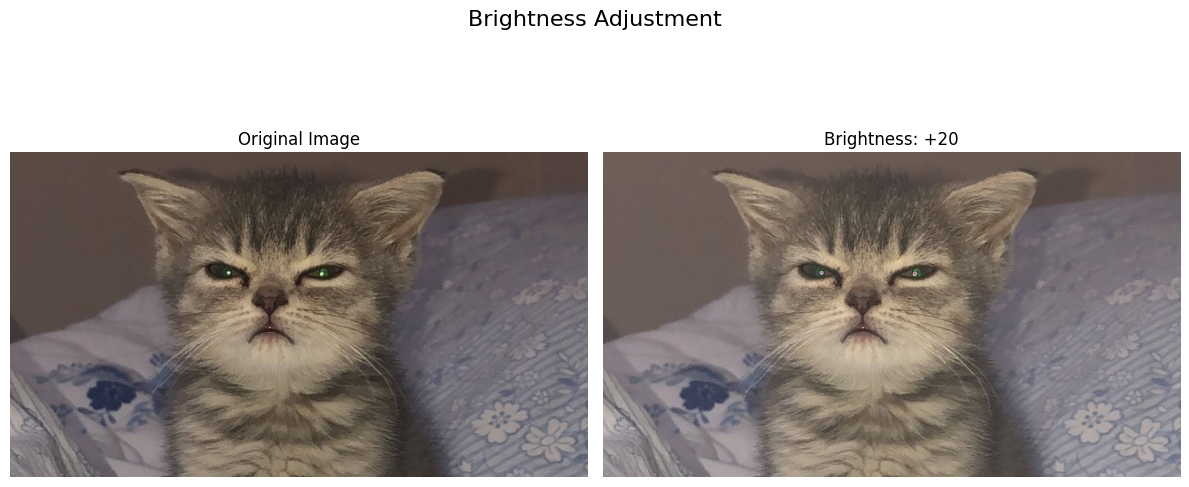


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



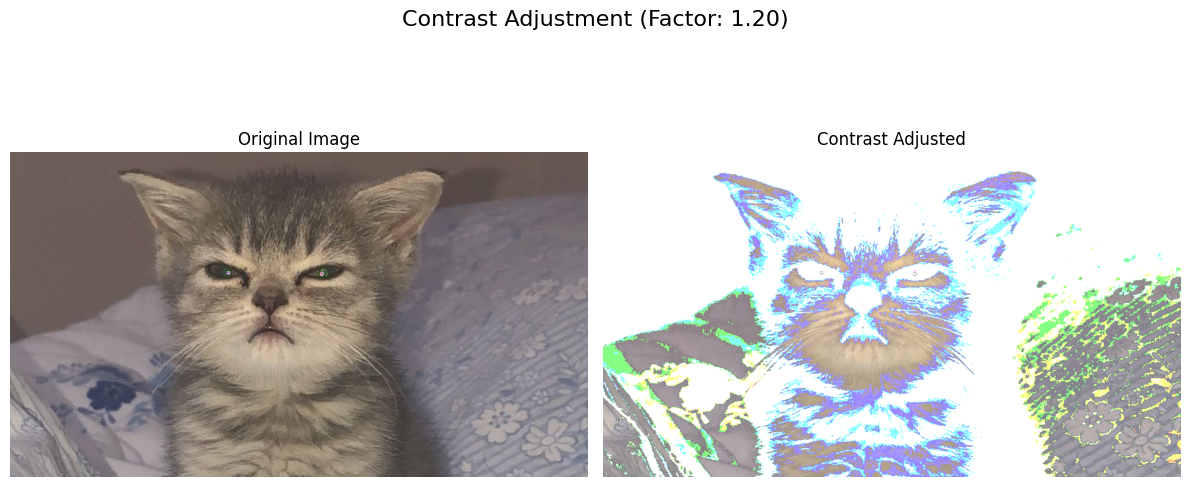


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



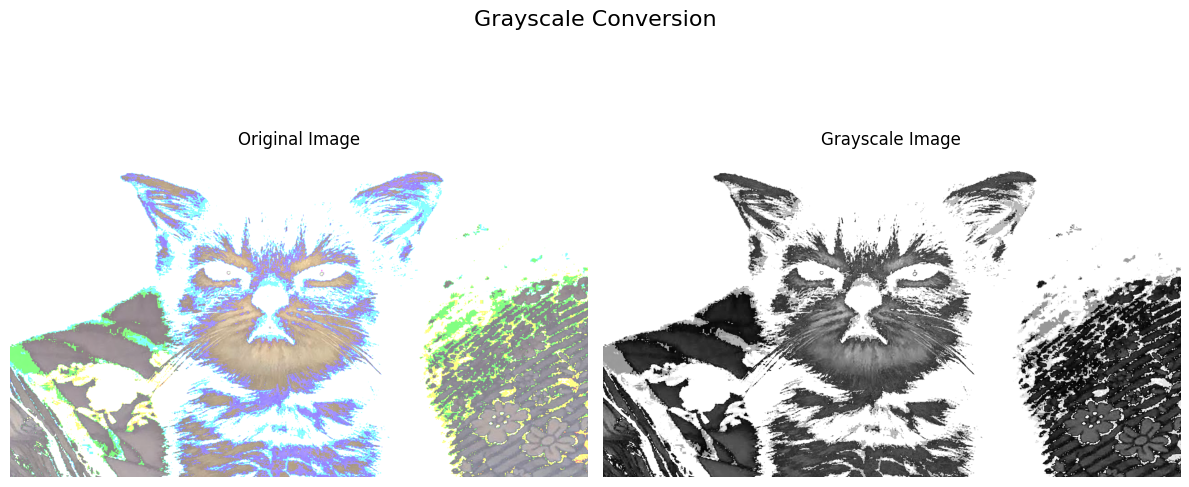


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit

Border types: constant, reflect, replicate


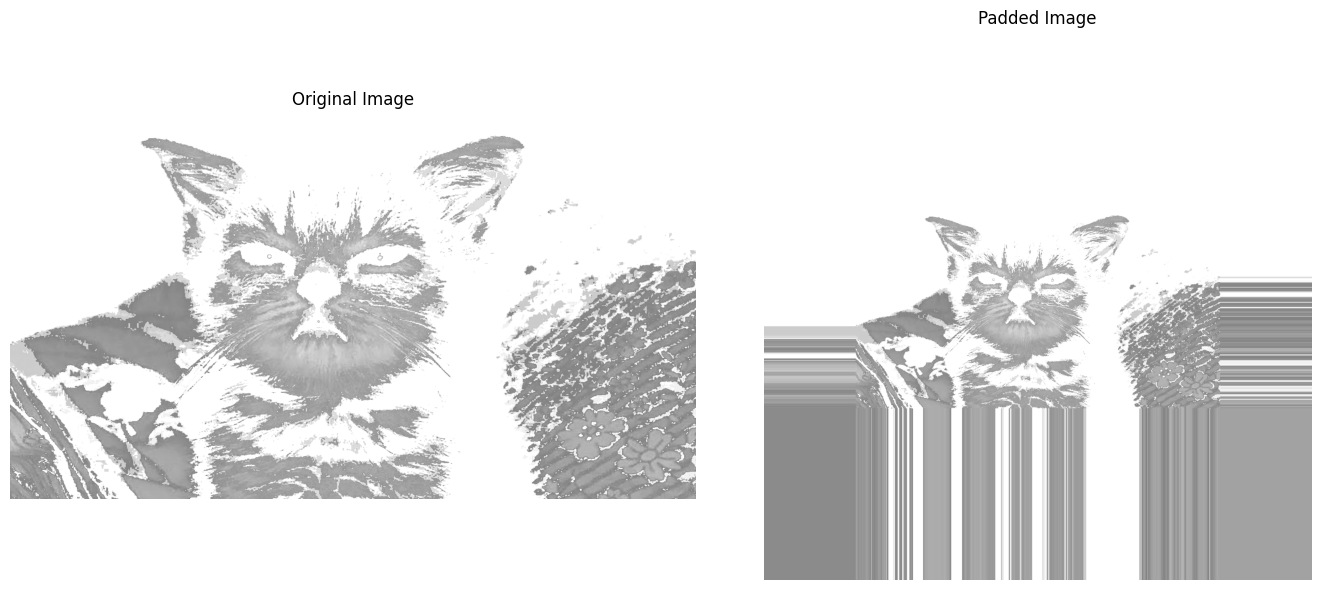


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



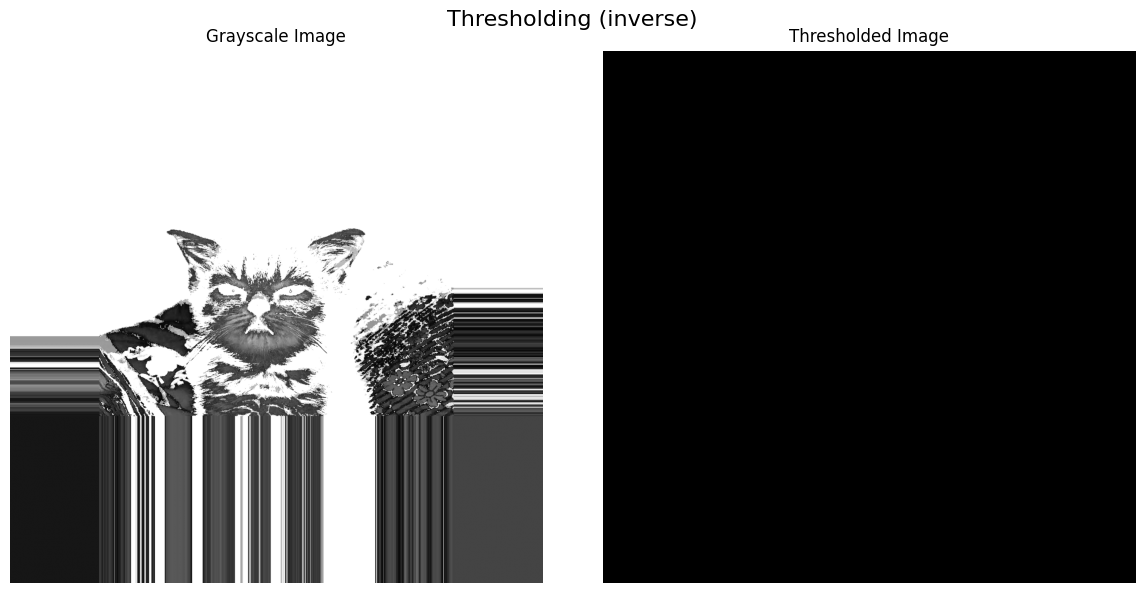


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit

Undo successful.

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit

Undo successful.

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



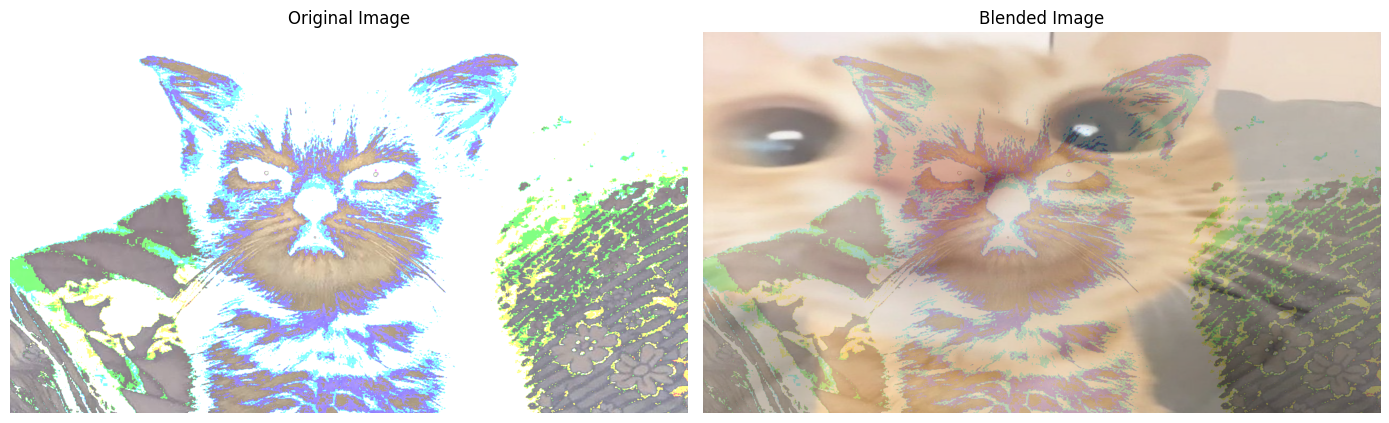


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit


=== Operation History ===
- brightness +20
- contrast factor 1.20
- converted to grayscale
- padded 600px x 320px with replicate
- threshold (inverse) applied
- blended with 'cat.jpg' using alpha=0.6


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit

Saving and exiting...

=== Operation History ===
- brightness +20
- contrast factor 1.20
- converted to grayscale
- padded 600px x 320px with replicate
- threshold (inverse) applied
- blended with 'cat.jpg' using alpha=0.6

Image saved as new_image.jpg


In [20]:
# === MAIN LOOP ===
def main():
    
    # input your image path
    image_path = input("Enter the path to the image: ")
    img = cv2.imread(image_path)
    
    # sample
    # img = cv2.imread("GatoOne.jpg")

# Check if the image was loaded successfully
    if img is None:
        print("Image could not be loaded.")
        # Exit the program if the image is not found
        sys.exit()

#initialize history with the original image
    save_state(img)

# keeps the program running until the user decides to exit
    while True:
        print("""
==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
""")
    
# conditions
        choice = input("Select an option: ")
        if choice == "1":
            value = int(input("Brightness value (-100 to 100): "))
            img = adjust_brightness(img, value)
        elif choice == "2":
            factor = float(input("Contrast factor (0.1 to 3.0) (Default: 1.0) : "))
            img = adjust_contrast(img, factor)
        elif choice == "3":
            img = convert_grayscale(img)
        elif choice == "4":
            img = add_padding(img)
        elif choice == "5":
            img = apply_threshold(img)
        elif choice == "6":
            img = blend_images(img)
        elif choice == "7":
            img = undo()
        elif choice == "8":
            show_history()
       
        # saves the image
        elif choice == "9":
            print("Saving and exiting...")
        # shows the history of operations
            show_history()
        
        # askes the user for a name to save the image
            name = input("Enter name for the saved image (default: edited_output.jpg): ")
            if not name:
                name = "edited_output.jpg"
            else:
                name += ".jpg"

            cv2.imwrite(name, img)
            print("Image saved as " + name)
        # closes the program
            break
        else:
            print("Invalid choice.")

        # displays the edited image
        cv2.imshow("Edited Image", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [21]:
# If I want to show side by side by but there were errors
# Load the original image
#original = cv2.imread("original.jpg")

# Stack images side-by-side
#side_by_side = np.hstack((original, img_resized))

# Show side-by-side result
#cv2.imshow("Original vs Edited", side_by_side)
#cv2.waitKey(0)
#cv2.destroyAllWindows()